# Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data 
data =pd.read_excel('K194141733_Nguyen Thi Hue Minh.xlsx', parse_dates=True, sheet_name ='financial_data')
public_date = pd.read_excel('K194141733_Nguyen Thi Hue Minh.xlsx', parse_dates = True, sheet_name = 'public_date')

In [3]:
data

,Unnamed: 0,Cash\n(VND)\nIn the last 13 FY,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208
0,Code,2009-12-31 00:00:00,2010-12-31 00:00:00,2011-12-31 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,...,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00,2019-12-31 00:00:00,2020-12-31 00:00:00,2021-12-31 00:00:00
1,CHP.HM,151707837090,179174174570,918953040,21755172820,772500790,6593310070,32191954370,3640091770,8109952760,...,860533949340,649689421050,729310348280,626484328600,528414619630,233151735350,NaN,NaN,NaN,787447457860
2,POM.HM,93217356440,115083879760,143297553550,158164302070,239684165810,21776944490,107032309760,68248345500,102440444270,...,11369574627890,9296925643430,9807578644920,10804878879950,9891226461080,11747783342230,11995221605600,11202742823760,7539334474000,13999252169230
3,V21.HN,5059049250,5738770100,7056365840,9061205830,54737587870,7800279420,4038692050,12401161140,20118895590,...,210010821470,160143599080,166816709430,242559800840,201891440130,300982433580,424318822610,520499523000,301049796000,125499975940
4,LIG.HN,190722278240,34374561660,49712969380,90951999990,124458300760,28911980440,13267593540,17965525080,18812801340,...,1187183297380,862224201590,1301734110780,1405589951180,847817512110,1058242469540,1185126380130,815021170970,488325167000,2439778222620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,DAG.HM,39640019030,47866359470,12902918100,21224871250,36499044560,13122324290,5598230680,15301958350,15289510010,...,1645576445760,1393142677170,1254000821030,1107965005490,1000976424200,893454593040,599862554540,328363834000,216549093000,1954159285500
676,PVL.HN,14226916630,4010542400,9010022390,3440077520,5532929430,3946331230,1927388620,1258316440,1091918340,...,566189176900,270724090,470240130,7888820910,8986905850,13194168480,83358722460,69618941000,75628187000,23741669820
677,CCI.HM,7886425610,4991107920,6641749290,3686616110,1738278140,2812390500,1903113040,1869214130,3626812670,...,335015601850,293946135410,372330767350,507015050510,444429004030,392609301570,344244049490,216201383000,164515808430,299154973980
678,PPP.HN,5509303740,9496907070,12374639250,6830763910,14168035420,3538236850,5445448340,1464070000,6745256020,...,131915448840,120904354920,99313771880,107807490680,101034648290,91647609980,84518461860,66713518420,49939315000,133289268790


## 1. Preprocessing data

In [4]:
#split data
name = data[data.columns[0]]
cash = data[data.columns[1:14]]
cash_operating = data[data.columns[14:27]]
cash_investing = data[data.columns[27:40]]
cash_financing = data[data.columns[40:53]]
dividend = data[data.columns[53:66]]
total_debt =data[data.columns[66:79]]
equity = data[data.columns[79:92]]
total_asset = data[data.columns[92:105]]
current_asset = data[data.columns[105:118]]
current_lia = data[data.columns[118:131]]
account_payable = data[data.columns[131:144]]
receivable =data[data.columns[144:157]]
roa = data[data.columns[157:170]]
fixed_asset = data[data.columns[170:183]]
market_cap = data[data.columns[183:196]]
revenue = data[data.columns[196:]]

In [5]:
# tranforms data 
def change_column(df):
    df.columns = df.iloc[0] #use first row (date) as header
    df= df.drop(0)          #delete date row
    df=df.transpose()       #transpose data
    df= df.astype('float')  #change data to float type
    return df

In [6]:
# tranform data with above function
name = name.drop(0)
cash = change_column(cash)
cash_operating = change_column(cash_operating)
cash_investing = change_column(cash_investing)
cash_financing = change_column(cash_financing)
dividend = change_column(dividend)
total_debt = change_column(total_debt)
equity = change_column(equity)
total_asset = change_column(total_asset)
current_asset = change_column(current_asset)
current_lia = change_column(current_lia)
account_payable = change_column(account_payable)
receivable = change_column(receivable)
roa = change_column(roa)
fixed_asset = change_column(fixed_asset)
market_cap = change_column(market_cap)
revenue = change_column(revenue)

In [7]:
# Drop firm are established under 5 years
firm_u5y = []
for i in name.index:
  if int(public_date.loc[i,'Date Became Public'].strftime('%Y')) > 2016:
    firm_u5y.append(i)      
print(len(firm_u5y))  # 163 companies are established under 5 years.

name = name.drop(firm_u5y,0)
cash = cash.drop(firm_u5y, axis = 1)
cash_operating = cash_operating.drop(firm_u5y, axis = 1)
cash_investing = cash_investing.drop(firm_u5y, axis = 1)
cash_financing = cash_financing.drop(firm_u5y, axis = 1)
dividend = dividend.drop(firm_u5y, axis = 1)
total_debt = total_debt.drop(firm_u5y, axis = 1)
equity = equity.drop(firm_u5y, axis = 1)
total_asset = total_asset.drop(firm_u5y, axis = 1)
current_asset = current_asset.drop(firm_u5y, axis = 1)
current_lia = current_lia.drop(firm_u5y, axis = 1)
account_payable = account_payable.drop(firm_u5y, axis = 1)
receivable = receivable.drop(firm_u5y, axis = 1)
roa = roa.drop(firm_u5y, axis = 1)
fixed_asset = fixed_asset.drop(firm_u5y, axis = 1)
market_cap = market_cap.drop(firm_u5y, axis = 1)
revenue = revenue.drop(firm_u5y, axis = 1)
public_date = public_date.drop(firm_u5y,axis=0)

167


In [8]:
# Fill Nan value with linear method
cash = cash.interpolate(method='linear', limit_direction='both', axis=0)
cash_operating = cash_operating.interpolate(method='linear', limit_direction='both', axis=0)
cash_investing = cash_investing.interpolate(method='linear', limit_direction='both', axis=0)
cash_financing = cash_financing.interpolate(method='linear', limit_direction='both', axis=0)
dividend = dividend.interpolate(method='linear', limit_direction='both', axis=0)
total_debt = total_debt.interpolate(method='linear', limit_direction='both', axis=0)
equity = equity.interpolate(method='linear', limit_direction='both', axis=0)
total_asset = total_asset.interpolate(method='linear', limit_direction='both', axis=0)
current_asset = current_asset.interpolate(method='linear', limit_direction='both', axis=0)
current_lia = current_lia.interpolate(method='linear', limit_direction='both', axis=0)
account_payable = account_payable.interpolate(method='linear', limit_direction='both', axis=0)
receivable = receivable.interpolate(method='linear', limit_direction='both', axis=0)
roa = roa.interpolate(method='linear', limit_direction='both', axis=0)
fixed_asset = fixed_asset.interpolate(method='linear', limit_direction='both', axis=0)
market_cap = market_cap.interpolate(method='linear', limit_direction='both', axis=0)
revenue = revenue.interpolate(method='linear', limit_direction='both', axis=0)

In [9]:
# Column name are numeric
# Change column name with firm name
cash.columns = name
cash_operating.columns = name
cash_investing.columns = name
cash_financing.columns = name
dividend.columns = name
total_debt.columns = name
equity.columns = name
total_asset.columns = name
current_asset.columns = name
current_lia.columns = name
account_payable.columns = name
receivable.columns = name
roa.columns = name
fixed_asset.columns = name
market_cap.columns = name
revenue.columns = name

### Calculate feature variables 

In [10]:
# Calculate Net Income
ni = roa*total_asset

#Calculate ROE 
roe = ni / equity

#Calculate Firm Size
size = np.log(total_asset)

#Calculate PPE ratio
ppe = fixed_asset/total_asset

#Calculate leverage ratio
lev=total_debt/total_asset

#Calculate Liquidity ratio
liq = current_asset/current_lia

#Calculate Revenue Growth
growth = revenue.pct_change()

#Calculate days sale outstanding ratio
dso = receivable / (revenue / 365)

#Calculate Net profit margin ratio
net_profit_margin = ni / revenue

#Calculate Total asset turnover
ta_turnover = revenue/total_asset

#Calculate Cash holding ratio
cash_holding =cash/total_asset

#Calculate Debt to equity ratio
d_e = total_debt/equity

#Calculate Net working capital ratio
nwc = (current_asset - current_lia)/total_asset

In [11]:
#Growth variable in 2009 is null
#Delete 2009 in all variables 
ni = ni.drop(ni.index[0], axis= 0)
roe = roe.drop(roe.index[0], axis= 0)
roa = roa.drop(roa.index[0], axis= 0)
size = size.drop(size.index[0], axis= 0)
ppe = ppe.drop(ppe.index[0], axis= 0)
lev = lev.drop(lev.index[0], axis= 0)
liq = liq.drop(liq.index[0], axis= 0)
growth = growth.drop(growth.index[0], axis=0)
dso = dso.drop(dso.index[0], axis= 0)
net_profit_margin = net_profit_margin.drop(net_profit_margin.index[0], axis= 0)
ta_turnover = ta_turnover.drop(ta_turnover.index[0], axis = 0)
cash_holding = cash_holding.drop(cash_holding.index[0], axis = 0)
d_e = d_e.drop(d_e.index[0], axis = 0)
nwc = nwc.drop(nwc.index[0], axis = 0)

In [12]:
roa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2010-12-31 to 2021-12-31
Columns: 512 entries, CHP.HM to IJC.HM
dtypes: float64(512)
memory usage: 48.1 KB


### Create target variable

In [13]:
# ROA >= 0.1 and ROE > 0.2 : target = 1 -> efficient business
# ROA < 0.1 or ROE < 0.2 : target = 0 -> ineffficient business 

target = pd.DataFrame(np.random.randn(12, 512), columns=roa.columns, index = roa.index)
for i in range(len(roa.index)):
  for j in range(len(roa.columns)):
    if roa.iloc[i,j] >= 0.15 and roe.iloc[i,j] >= 0.2:
      target.iloc[i,j] = 1
    else:
      target.iloc[i,j] = 0
print(target.to_string())

Unnamed: 0  CHP.HM  POM.HM  V21.HN  LIG.HN  MCC.HN  TET.HN  NBW.HN  TDC.HM  OGC.HM  HTC.HN  NVT.HM  VCM.HN  SPM.HM  CX8.HN  TNT.HM  HU1.HM  SBA.HM  IDV.HN  AME.HN  PXS.HM  GDW.HN  PDN.HM  VXB.HN  PXI.HM  NNC.HM  DLG.HM  CMV.HM  VE3.HN  BCE.HM  UDC.HM  DC2.HN  DTA.HM  AAA.HM  LDP.HN  DRH.HM  SMT.HN  HHG.HN  VRC.HM  VE2.HN  HMH.HN  PDR.HM  VLA.HN  PCT.HN  CVN.HN  QCG.HM  MIM.HN  WCS.HN  SMB.HM  NET.HN  VOS.HM  SHP.HM  PTL.HM  HVX.HM  VMD.HM  OCH.HN  APP.HN  HAT.HN  TIG.HN  C32.HM  SMA.HM  ELC.HM  DSN.HM  HQC.HM  TDW.HM  ARM.HN  KTT.HN  LM7.HN  SCR.HM  CMX.HM  LM8.HM  LCD.HN  PRC.HN  CMS.HN  VNF.HN  VKC.HN  EVE.HM  PV2.HN  HTI.HM  VSI.HM  ADC.HN  HDA.HN  PCG.HN  KST.HN  KTS.HN  BSC.HN  PPS.HN  HTL.HM  CLW.HM  TVD.HN  MDG.HM  PTD.HN  NKG.HM  TSB.HN  VCF.HM  MCF.HN  DNM.HN  VCA.HM  D11.HN  CCL.HM  C47.HM  DIH.HN  NDN.HN  VIE.HN  IDI.HM  JVC.HM  PTB.HM  CIG.HM  INC.HN  THG.HM  HOT.HM  SVN.HN  L14.HN  SVT.HM  LCM.HM  PPE.HN  FLC.HM  CNG.HM  BRC.HM  HHS.HM  GSP.HM  AMC.HN  LAS.HN  DRL.HM  GAS.

In [14]:
#Count number of class 0 and 1
pd.Series(target.values.flatten()).value_counts()

0.0    5500
1.0     644
dtype: int64

In [15]:
# Create a dataframe include target and features
df = pd.DataFrame()
df['Target'] = target.values.flatten()
df['Size'] = size.values.flatten()
df['PPE'] = ppe.values.flatten()
df['Leverage'] = lev.values.flatten()
df['Liquidity'] = liq.values.flatten()
df['Growth'] = growth.values.flatten()
df['Days Sale Outstanding'] = dso.values.flatten()
df['Net profit margin'] = net_profit_margin.values.flatten()
df['Total asset turnover'] = ta_turnover.values.flatten()
df['Cash holding'] = cash_holding.values.flatten()
df['Debt to equity'] = d_e.values.flatten()
df['Net working capital'] = nwc.values.flatten()

date = np.arange(2010,2022)
company = list(size.columns)
index = pd.MultiIndex.from_product([date, company],
                           names=['Date', 'Company'])
df.index = index

In [16]:
df

Target       Size       PPE  Leverage  Liquidity     Growth  \
Date Company                                                                
2010 CHP.HM      0.0  28.915192  0.883542  0.445971   0.799055  -0.140862   
     POM.HM      0.0  30.099015  0.418197  0.613493   1.007675   0.221532   
     V21.HN      0.0  26.751078  0.063703  0.160184   1.260203   1.323242   
     LIG.HN      0.0  29.034811  0.390677  0.451864   1.123266  -0.046847   
     MCC.HN      0.0  25.126507  0.051425  0.036713   1.579468   0.786426   
...              ...        ...       ...       ...        ...        ...   
2021 DAG.HM      0.0  28.339258  0.297977  0.478079   1.407770   8.024094   
     PVL.HN      0.0  26.737964  0.112099  0.000000   1.029174  -0.686074   
     CCI.HM      0.0  27.258743  0.065255  0.000000  15.990840   0.818397   
     PPP.HN      0.0  25.773314  0.412572  0.012818   1.804495   1.669025   
     IJC.HM      0.0  29.549216  0.131973  0.164962   2.478466  10.100094   

              Days Sale Outstanding  Net profit margin  Total asset turnover  \
Date Company                                                                   
2010 CHP.HM               83.508914           0.338541              0.197564   
     POM.HM               90.876614          -0.026699              1.016634   
     V21.HN              117.663275           0.001342              0.911543   
     LIG.HN              193.301402           0.011172              0.547529   
     MCC.HN                5.241251           0.071182              1.109014   
...                             ...                ...                   ...   
2021 DAG.HM               42.135635           0.004736              0.962447   
     PVL.HN             -747.271130           0.730797              0.057991   
     CCI.HM                7.784551           0.108560              0.434085   
     PPP.HN               28.605298           0.131219              0.854254   
     IJC.HM               65.154765           0.238156              0.382120   

              Cash holding  Debt to equity  Net working capital  
Date Company                                                     
2010 CHP.HM       0.049610        0.912971            -0.024564  
     POM.HM       0.009754        2.075210             0.004378  
     V21.HN       0.013835        0.574461             0.187647  
     LIG.HN       0.008445        3.864637             0.056733  
     MCC.HN       0.041373        0.042589             0.075368  
...                    ...             ...                  ...  
2021 DAG.HM       0.063324        1.422398             0.194366  
     PVL.HN       0.131877        0.000000             0.011071  
     CCI.HM       0.629989        0.000000             0.631530  
     PPP.HN       0.116119        0.017155             0.202228  
     IJC.HM       0.022414        0.335896             0.421253  

[6144 rows x 12 columns]

In [17]:
#check missing value 
(df.isnull().sum()/6144*100).sort_values(axis=0, ascending=False)

Target                   0.0
Size                     0.0
PPE                      0.0
Leverage                 0.0
Liquidity                0.0
Growth                   0.0
Days Sale Outstanding    0.0
Net profit margin        0.0
Total asset turnover     0.0
Cash holding             0.0
Debt to equity           0.0
Net working capital      0.0
dtype: float64

No feature is missing value

## 2. Statistic descriptive and visualization

In [18]:
df.iloc[:,1:].describe()

,Size,PPE,Leverage,Liquidity,Growth,Days Sale Outstanding,Net profit margin,Total asset turnover,Cash holding,Debt to equity,Net working capital
count,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000
mean,27.193043,0.247771,0.217523,2.492739,6.714729,350.526422,0.052748,1.192837,0.063310,0.762913,0.224419
std,1.579222,0.219419,0.186861,5.744780,475.217809,10619.525264,2.090806,1.284589,0.092147,1.267551,0.224670
min,20.974620,0.000000,0.000000,0.000000,-4.515765,-40610.161558,-123.024748,-0.047302,-0.003437,-1.105085,-0.544713
25%,26.134743,0.074115,0.041160,1.133920,-0.178652,34.938549,0.020292,0.437389,0.013698,0.065317,0.066223
50%,27.125122,0.181403,0.187938,1.516974,-0.041412,72.553760,0.053426,0.889251,0.034207,0.395935,0.199904
75%,28.142255,0.357496,0.351932,2.404122,0.155876,143.705201,0.123461,1.504465,0.074290,1.041591,0.369649
max,33.691042,1.122133,0.954313,242.577244,37244.404527,818071.607608,28.473115,19.836378,1.741029,40.341193,0.986337


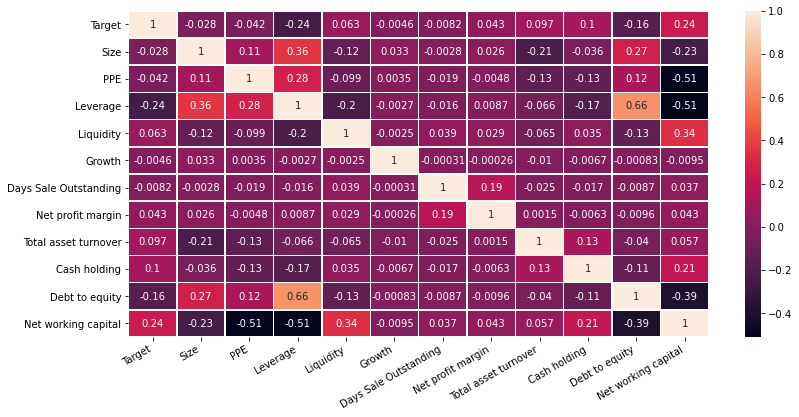

In [19]:
# Correlation
corrmat = df.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [20]:
df.columns

Index(['Target', 'Size', 'PPE', 'Leverage', 'Liquidity', 'Growth',
       'Days Sale Outstanding', 'Net profit margin', 'Total asset turnover',
       'Cash holding', 'Debt to equity', 'Net working capital'],
      dtype='object')

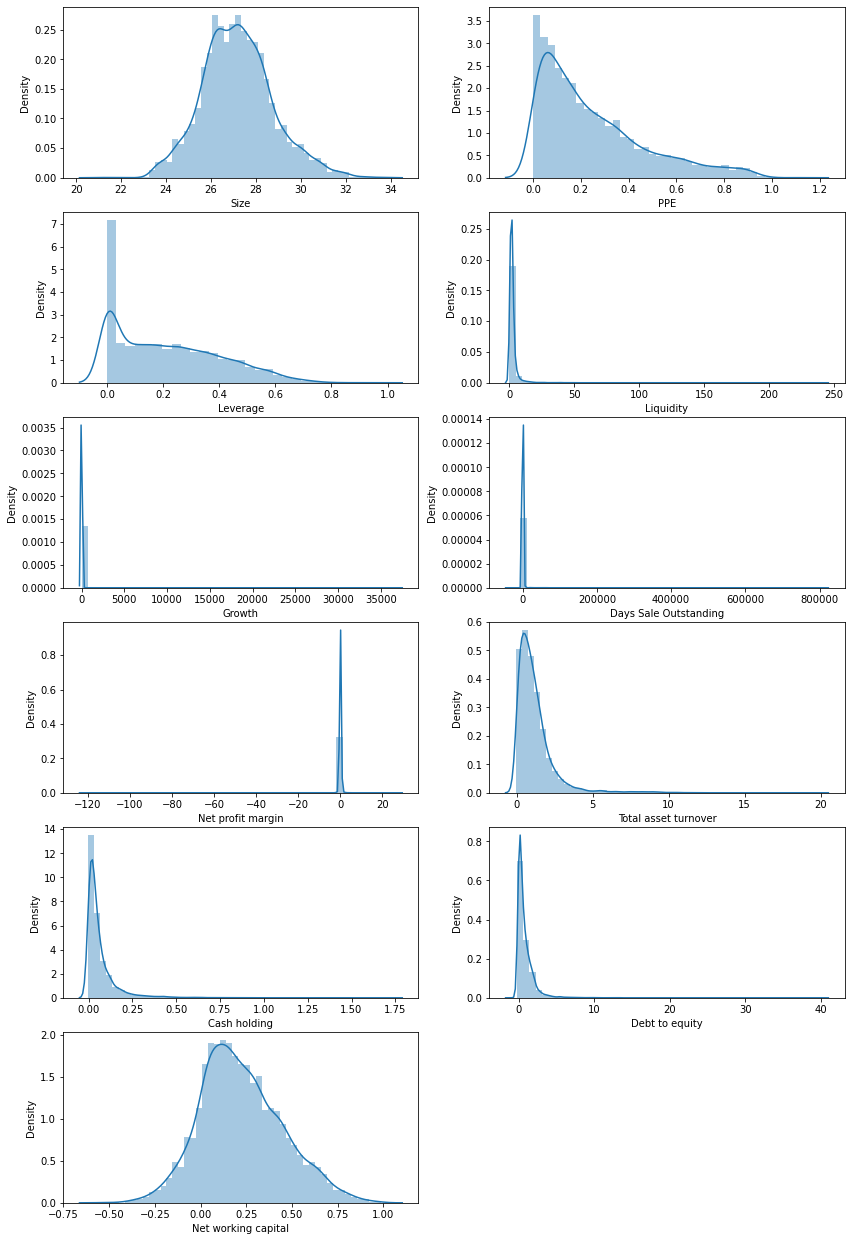

In [24]:
plt.figure(figsize=(14,22))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(6,2,x)
    sns.distplot(df[i])
    x+=1
  plt.show()

density(['Size', 'PPE', 'Leverage', 'Liquidity', 'Growth',
       'Days Sale Outstanding', 'Net profit margin', 'Total asset turnover',
         'Cash holding', 'Debt to equity', 'Net working capital'])

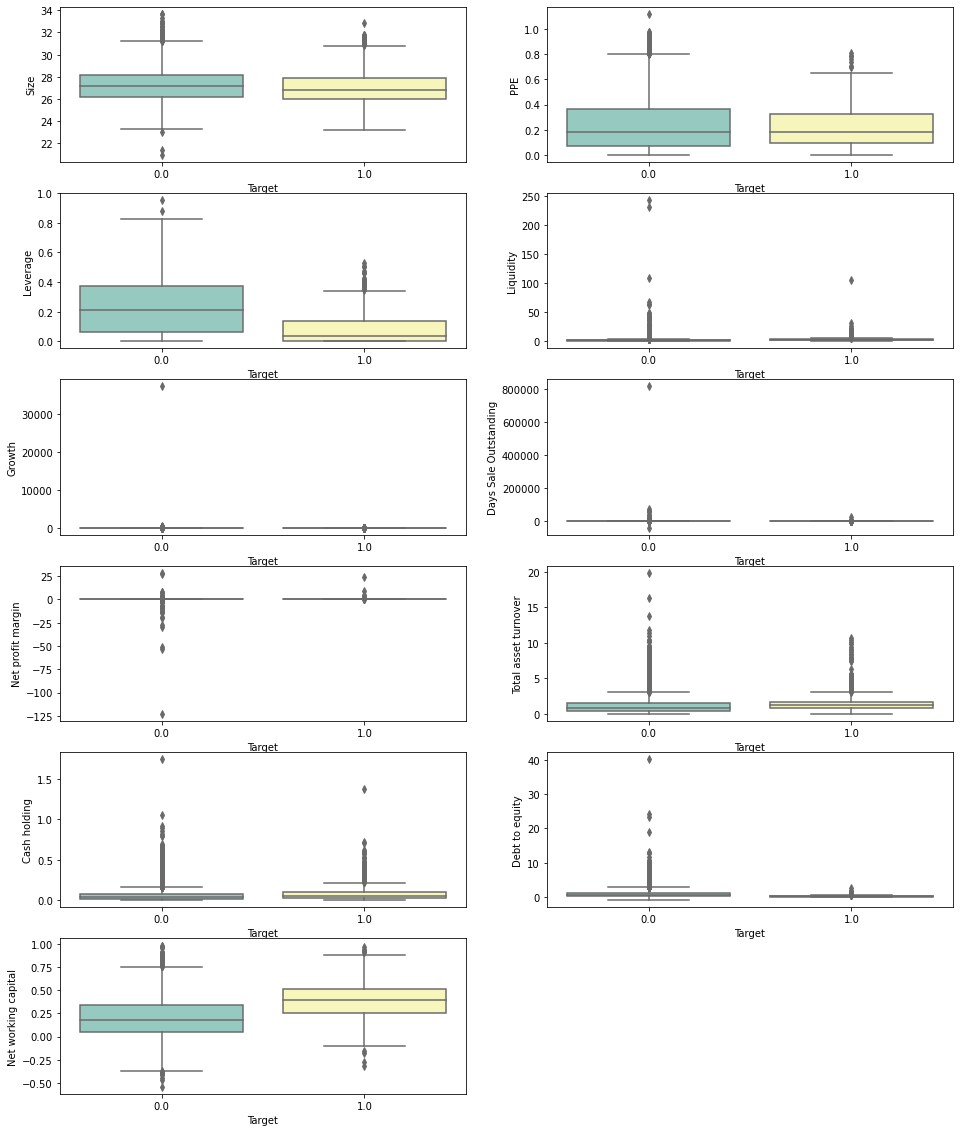

In [22]:
plt.figure(figsize=(16,20))
def density(list_variables):
  x=1
  for i in list_variables:
    plt.subplot(6,2,x)
    sns.boxplot(x='Target', y=i, data=df,  palette="Set3")
    x+=1
  plt.show()

density(['Size', 'PPE', 'Leverage', 'Liquidity', 'Growth',
       'Days Sale Outstanding', 'Net profit margin', 'Total asset turnover',
         'Cash holding', 'Debt to equity', 'Net working capital'])

## 3. Build model

In [23]:
# Split X, y from dataframe
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 0)

optimal n_estimators value is 91 that accuracy is 0.966145114139034


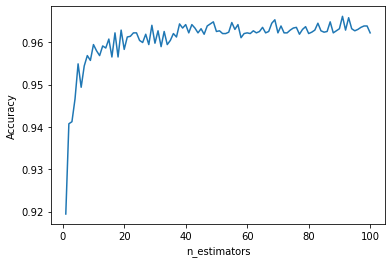

In [25]:
#Find best number of estimators
from sklearn.model_selection import GridSearchCV
n_estimators = list(range(1, 101))   # 100 cases from 1 to 100 Decision Trees to generate 100 Random Forest Metrics
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs=gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

ind = np.where(scores == np.amax(scores))[0][0]+1

print(f'optimal n_estimators value is {ind} that accuracy is {scores.max()}')

plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [26]:
#Training model
classifier = RandomForestClassifier(n_estimators = ind, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=91, random_state=0)

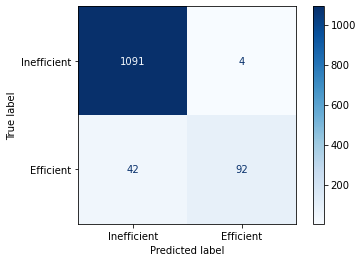

In [27]:
# Confusion matrix
clf = classifier.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test,y_test,cmap= 'Blues', display_labels = ['Inefficient', 'Efficient'])

In [28]:
#Classification report
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print('Random forest accuracy: ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1095
         1.0       0.96      0.69      0.80       134

    accuracy                           0.96      1229
   macro avg       0.96      0.84      0.89      1229
weighted avg       0.96      0.96      0.96      1229

Random forest accuracy:  0.9625711960943857


### Oversampling data

In [29]:
#upsample minority data
from sklearn.utils import resample

df2 = df

# Split majority data and minority data
df_majority = df2[df2['Target']==0]
df_minority = df2[df2['Target']==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.value_counts('Target')


Target
0.0    5500
1.0    5500
dtype: int64

In [30]:
# Split X, y set 
X2 = df_upsampled.iloc[:, 1:].values
y2= df_upsampled.iloc[:,0].values

In [31]:
#Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state=0)

In [32]:
#Training model
classifier2 = RandomForestClassifier(n_estimators = ind, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train2, y_train2)

RandomForestClassifier(criterion='entropy', n_estimators=91, random_state=0)

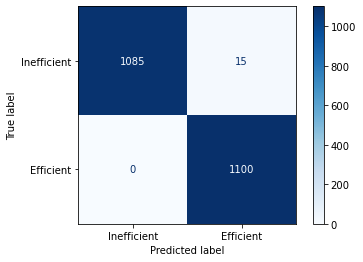

In [33]:
# Confusion matrix
clf2 = classifier2.fit(X_train2, y_train2)
plot_confusion_matrix(clf2, X_test2,y_test2,cmap= 'Blues', display_labels = ['Inefficient', 'Efficient'])

In [34]:
#Classification report
y_pred2 = classifier2.predict(X_test2)
print(classification_report(y_test2,y_pred2))
print('Random forest accuracy: ', accuracy_score(y_test2, y_pred2))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1100
         1.0       0.99      1.00      0.99      1100

    accuracy                           0.99      2200
   macro avg       0.99      0.99      0.99      2200
weighted avg       0.99      0.99      0.99      2200

Random forest accuracy:  0.9931818181818182


## Feature importance 

In [35]:
# feature importance
importance_dt = classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': df.columns[1:], 'Random Forest Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
6,Net profit margin,0.320230
7,Total asset turnover,0.217287
5,Days Sale Outstanding,0.082637
9,Debt to equity,0.068067
10,Net working capital,0.061727
3,Liquidity,0.053882
0,Size,0.042914
2,Leverage,0.041936
8,Cash holding,0.038346
1,PPE,0.037073


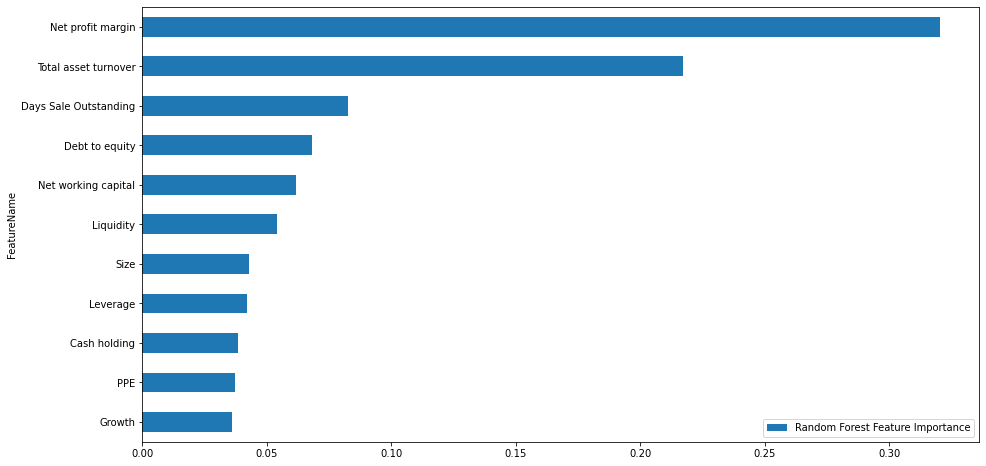

In [36]:
features_importances_dt.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")